In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('sonar.csv',header=None)
df.shape

(208, 61)

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [38]:
x=df.drop(60,axis=1)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [39]:
y=df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

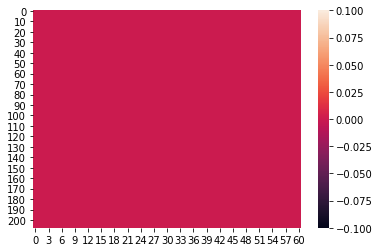

In [41]:
sns.heatmap(df.isnull())

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,r2_score,mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [43]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=LogisticRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(LogisticRegression(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  89  is:  0.6190476190476191


-0.3919191919191921

In [66]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=SVC(kernel='poly')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(SVC(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  63  is:  0.8885941644562334


-0.4487878787878792

In [47]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=DecisionTreeClassifier(criterion='gini')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  56  is:  0.3318181818181818


-0.6425757575757579

In [48]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=GaussianNB()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(GaussianNB(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  87  is:  0.23636363636363622


-0.580757575757576

In [49]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=MultinomialNB()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(GaussianNB(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  42  is:  0.29326923076923084


-0.580757575757576

In [50]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=AdaBoostClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(AdaBoostClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  94  is:  0.7136363636363636


-0.1986868686868689

In [51]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(RandomForestClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  46  is:  0.7083333333333335


-0.1168686868686871

In [52]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=GradientBoostingClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(GradientBoostingClassifier(),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  56  is:  0.8090909090909091


-0.23212121212121234

In [53]:
max_r_score=0
final_rstate=42
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    model=KNeighborsClassifier(n_neighbors=10)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    if r2score>max_r_score:
        max_r_score=r2score
        final_rstate=r_state
print()
print()
print('max r2_score corresponding to: ',final_rstate,' is: ',max_r_score)
cross_val_score(KNeighborsClassifier(n_neighbors=10),x,y,cv=10,scoring='r2').mean()



max r2_score corresponding to:  53  is:  0.1378299120234604


-0.7880808080808084

# SVC Gives the Best Results - Model Selected is SVC

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.2)
model=SVC(kernel='poly',probability=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [74]:
print('r2 Score is:', r2_score(y_test,y_pred))

r2 Score is: 0.8885941644562334


In [75]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.1543033499620919


In [76]:
print('AUC_Score:',roc_auc_score(y_test,y_pred))

AUC_Score: 0.9615384615384616


<function matplotlib.pyplot.show(*args, **kw)>

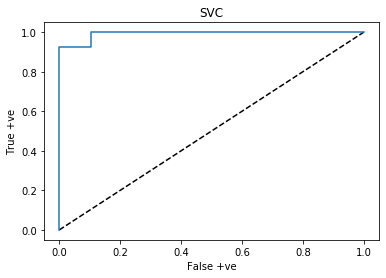

In [77]:
y_pred_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('SVC')
plt.show

In [78]:
print(confusion_matrix(y_test, y_pred))

[[29  0]
 [ 1 12]]


In [79]:
from sklearn.externals import joblib
joblib.dump(model,'Sonar.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Sonar.pkl']

In [ ]:
END!